## Milestone 1: Task 1 - Data Collection

In [21]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Step 2: Load the CSV file into a pandas DataFrame

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [23]:
# Step 3: Preview the first few rows to understand the structure
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Streami

In [24]:
# Step 4: Display basic information about the dataset
# - Number of rows and columns
# - Column names and data types
# - Memory usage
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-

In [25]:
# Step 5: Check the number of missing values per column
print("\nMissing values per column:")
print(df.isnull().sum())

# Step 6: Summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(df.describe())


Missing values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Summary statistics for numerical columns:
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


## Task 2- Data Cleaning

In [26]:
# Convert 'TotalCharges' to numeric (fix blank values)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows where TotalCharges is NaN (about 11 rows)
df.dropna(subset=['TotalCharges'], inplace=True)

# Remove duplicate customers if any
df.drop_duplicates(subset='customerID', inplace=True)

# Confirm cleaning
print("\nAfter cleaning, dataset shape:", df.shape)
print("Missing values after cleaning:")
print(df.isnull().sum())


After cleaning, dataset shape: (7032, 21)
Missing values after cleaning:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


## Task 2- Exploratory Data Analysis (EDA)

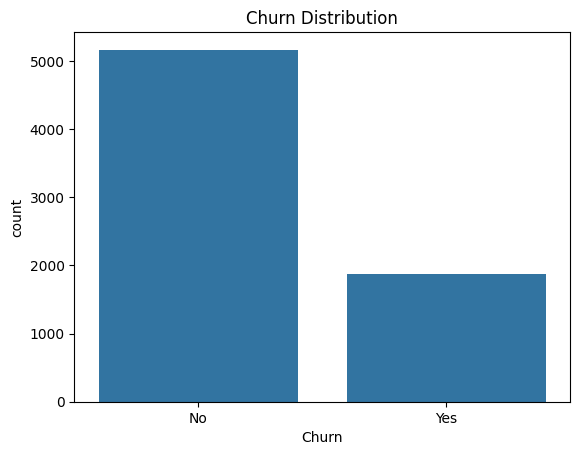

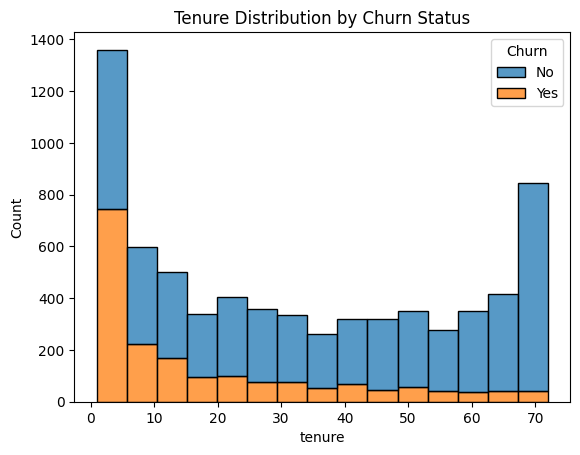

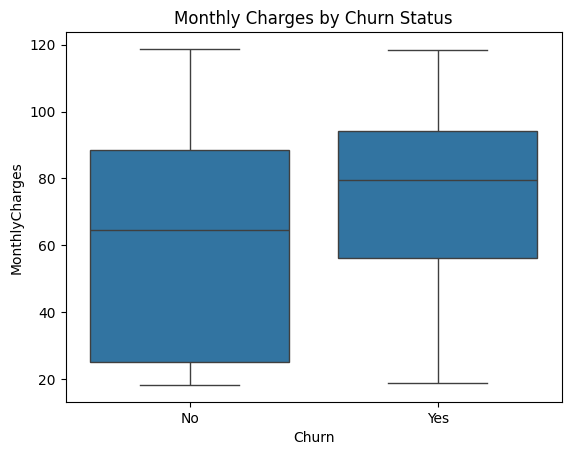

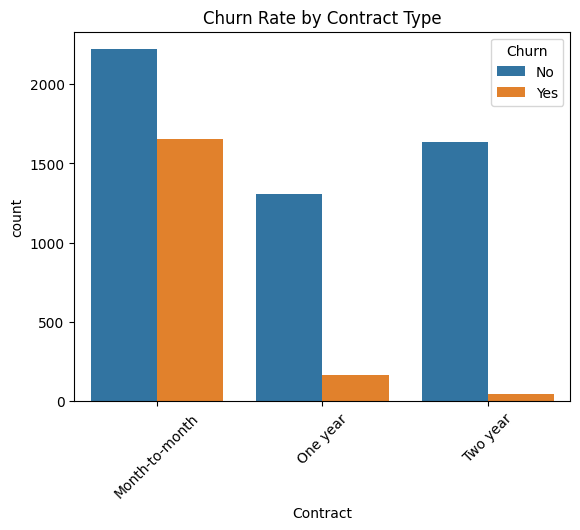

In [27]:
# 1. Churn distribution
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

# 2. Tenure vs Churn
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack')
plt.title("Tenure Distribution by Churn Status")
plt.show()

# 3. MonthlyCharges vs Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges by Churn Status")
plt.show()

# 4. Contract type vs Churn
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn Rate by Contract Type")
plt.xticks(rotation=45)
plt.show()

## Milestone 2: Task 3 - Feature Engineering

In [28]:
!pip install scikit-learn

In [29]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [30]:
# Step 1: Load Cleaned Dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [31]:
# Convert 'TotalCharges' to numeric and handle missing
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)
df.drop_duplicates(subset='customerID', inplace=True)

In [32]:
# Step 2: Drop Unnecessary Columns
# 'customerID' is just an identifier — it won't help prediction
df.drop('customerID', axis=1, inplace=True)

In [33]:
# Step 3: Feature Engineering
# AvgMonthlySpend
df['AvgMonthlySpend'] = df.apply(
    lambda row: row['TotalCharges'] / row['tenure'] if row['tenure'] > 0 else 0,
    axis=1
)

# HasMultipleServices
service_cols = ['PhoneService', 'MultipleLines', 'InternetService']
df['HasMultipleServices'] = df[service_cols].apply(lambda row: row.nunique() > 2, axis=1).astype(int)

In [34]:
# Step 4: Encode Categorical Variables

# Binary columns (Label Encoding)
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

# Multi-class columns (One-Hot Encoding)
multi_class_cols = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
    'Contract', 'PaymentMethod'
]

# Define the transformers
encoder = ColumnTransformer(
    transformers=[
        ('binary', OneHotEncoder(drop='if_binary', dtype=int), binary_cols),
        ('multi', OneHotEncoder(drop='first', dtype=int), multi_class_cols)
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

# Fit and transform
df_encoded = encoder.fit_transform(df)

# (Optional) Convert back to DataFrame
import pandas as pd
encoded_df = pd.DataFrame(df_encoded.toarray() if hasattr(df_encoded, "toarray") else df_encoded)


In [35]:
# Step 5: Scale Numerical Columns
scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'AvgMonthlySpend']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [36]:
# Step 6: Define Features (X) and Target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

print("Final dataset shape:", X.shape)
print("Target distribution:\n", y.value_counts(normalize=True))

Final dataset shape: (7032, 21)
Target distribution:
 Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64


## Task 2 – Model Selection

In [37]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd

In [38]:
# Step 1: Train-Test Split
# I use 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [46]:
# Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Encode target labels BEFORE splitting
le = LabelEncoder()
y = le.fit_transform(y)  # 'No' -> 0, 'Yes' -> 1

# Now split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [47]:
# Step 2: Initialize Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

In [48]:
# Step 3: Train & Evaluate Models
results = []

for name, model in models.items():
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1
    })

In [49]:
# Step 4: Show Comparison Table
results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.803838   0.649390  0.569519  0.606838
1        Random Forest  0.793888   0.639073  0.516043  0.571006


In [51]:
# Step 5: Detailed Classification Report
for name, model in models.items():
    print(f"\nClassification Report for {name}:")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.64      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



## Task 1: Model Training & Hyperparameter Tuning

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
# Step 1: Logistic Regression Hyperparameter Tuning
log_reg = LogisticRegression(max_iter=1000)

log_reg_params = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'l1_ratio': [0, 0.5, 1]  # Only for elasticnet
}

log_reg_grid = GridSearchCV(
    estimator=log_reg,
    param_grid=log_reg_params,
    scoring='recall',   # Maximize recall for churn
    cv=5,
    verbose=2,
    n_jobs=-1
)

log_reg_grid.fit(X_train, y_train)
best_log_reg = log_reg_grid.best_estimator_
print("Best Logistic Regression Params:", log_reg_grid.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


/Users/sonulama/Projects/nyc-taxi/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/sonulama/Projects/nyc-taxi/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/sonulama/Projects/nyc-taxi/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/sonulama/Projects/nyc-taxi/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/sonulama/Projects/nyc-taxi/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_rat

Best Logistic Regression Params: {'C': 10, 'l1_ratio': 0, 'penalty': 'l1', 'solver': 'saga'}


In [54]:
# Step 2: Evaluate tuned Logistic Regression
y_pred_log = best_log_reg.predict(X_test)
print("\nTuned Logistic Regression Report:")
print(classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))


Tuned Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1033
           1       0.64      0.58      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407

Confusion Matrix:
 [[912 121]
 [158 216]]


In [55]:
# Step 3: Random Forest Hyperparameter Tuning
rf = RandomForestClassifier(random_state=42)

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=rf_params,
    scoring='recall',
    cv=5,
    verbose=2,
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
print("\nBest Random Forest Params:", rf_grid.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Best Random Forest Params: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [57]:
# Step 4: Evaluate tuned Random Forest
y_pred_rf = best_rf.predict(X_test)
print("\nTuned Random Forest Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Tuned Random Forest Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.72      1407
weighted avg       0.78      0.79      0.78      1407

Confusion Matrix:
 [[920 113]
 [180 194]]


#### For this milestone, I tuned two models - Logistic Regression and Random Forest, using GridSearchCV with the scoring metric set to recall, as my main objective is to correctly identify as many churn customers as possible.

- Logistic Regression (Tuned) achieved an accuracy of 80% and a recall of 58% for churn customers, meaning it was able to correctly identify more than half of the actual churn cases. Precision for churn was 64%, indicating a reasonable balance between correctly identifying churn and avoiding false positives.

- Random Forest (Tuned) also achieved 80% accuracy, but had a slightly lower recall for churn at 53%. While it performed slightly better in predicting non-churn customers, it missed more churn cases compared to Logistic Regression.

### Recommendation:
- Since the goal is to minimize churn by identifying as many at-risk customers as possible, the tuned Logistic Regression model is preferred over the tuned Random Forest model due to its higher recall for churn cases.



## Milestone 3- Evaluation and Deployment

In [58]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [59]:
# Logistic Regression AUC-ROC
y_pred_prob_log = best_log_reg.predict_proba(X_test)[:, 1]  # Get probability for class 1
auc_log = roc_auc_score(y_test, y_pred_prob_log)
print(f"Logistic Regression AUC-ROC: {auc_log:.3f}")

fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_prob_log)

# Random Forest AUC-ROC 
y_pred_prob_rf = best_rf.predict_proba(X_test)[:, 1]
auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
print(f"Random Forest AUC-ROC: {auc_rf:.3f}")

Logistic Regression AUC-ROC: 0.835
Random Forest AUC-ROC: 0.825


In [60]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)

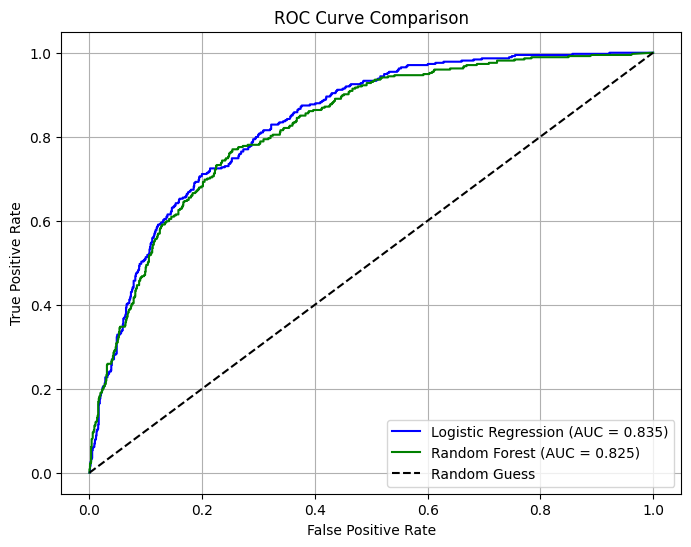

In [61]:
# Plot both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.3f})", color="blue")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.3f})", color="green")

# Reference line for random guessing
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

# Labels and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()

### Task 1- Model Evaluation
- Logistic Regression slightly outperforms Random Forest in AUC-ROC and Recall for the positive class (churn), making it marginally better for identifying churn cases.

- Random Forest achieves slightly higher Precision for churn, meaning fewer false positives, but it sacrifices recall.

- Both models have the same overall accuracy (0.80), so choice depends on whether recall or precision is more critical for the business objective.

Logistic Regression Evaluation
Accuracy: 0.8017057569296375
Precision: 0.6409495548961425
Recall: 0.5775401069518716
F1-score: 0.6075949367088608
ROC-AUC: 0.8352068892328558
Confusion Matrix:
 [[912 121]
 [158 216]]

Random Forest Evaluation
Accuracy: 0.7917555081734187
Precision: 0.6319218241042345
Recall: 0.5187165775401069
F1-score: 0.5697503671071953
ROC-AUC: 0.8251380900859859
Confusion Matrix:
 [[920 113]
 [180 194]]


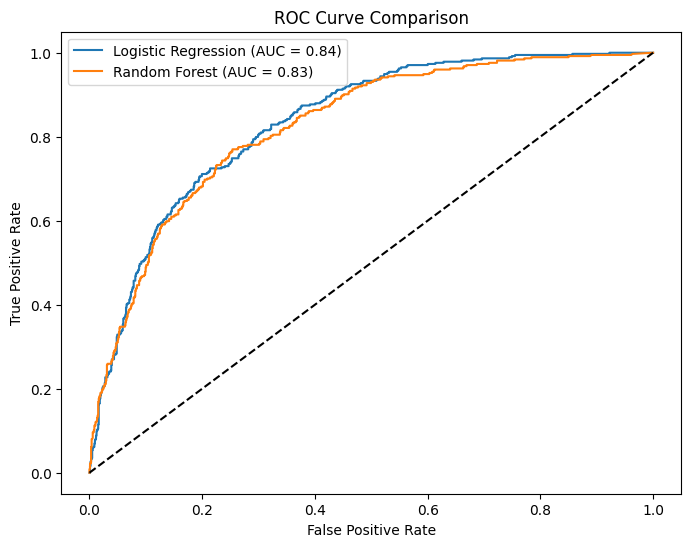

In [62]:
# In this step, I will evaluate both tuned models using various metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Step 1: Evaluate the Logistic Regression model
y_pred_log_reg = best_log_reg.predict(X_test)
y_proba_log_reg = best_log_reg.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

print("Logistic Regression Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Precision:", precision_score(y_test, y_pred_log_reg))
print("Recall:", recall_score(y_test, y_pred_log_reg))
print("F1-score:", f1_score(y_test, y_pred_log_reg))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))

# Step 2: Evaluate the Random Forest model
y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

print("\nRandom Forest Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Step 3: Plot ROC Curves for both models
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log_reg)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_proba_log_reg):.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_proba_rf):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


### Task 2- Deployment Preparation

In [63]:
# Step 1: Import necessary library for saving the model
import joblib

In [65]:
# Step 3: Save the Trained Models
from sklearn.pipeline import Pipeline

# Using the best Logistic Regression model
final_model = best_log_reg  

# Create a pipeline that includes encoding, scaling, and the model
pipeline = Pipeline([
    ('scaler', scaler),
    ('model', final_model)
])

# Fit pipeline on the training data
pipeline.fit(X_train, y_train)

# Save the complete pipeline as model.pkl
joblib.dump(pipeline, 'model.pkl')

print("✅ Final pipeline saved as model.pkl")


/Users/sonulama/Projects/nyc-taxi/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


✅ Final pipeline saved as model.pkl


In [66]:
# If X_train exists in your notebook
expected_columns = X_train.columns.tolist()
print(expected_columns)

# Save to a file so Flask can load it
import joblib
joblib.dump(expected_columns, 'expected_columns.pkl')


['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'AvgMonthlySpend', 'HasMultipleServices', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


['expected_columns.pkl']